LUIZ DA SILVA MOURA 
11611EMT028

Imports necessarios


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import concurrent.futures
import planta

função de avaliação

In [83]:
def mult_aval(people):
    people_aval = np.array([])
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for inp, response in zip(people, executor.map(planta.aval_model, people)):
            inp[3] = response
            if(len(people_aval) > 0):
                people_aval = np.append(people_aval,[inp], axis=0)
            else:
                people_aval = np.array([inp])
    return people_aval


metodo de seleção

In [84]:
def random_ferormo(pesos):
    sumpos = pesos[0]/sum(pesos)
    ran = random.uniform(0,1)
    lucky = 0
    while(sumpos<ran):
        lucky = lucky+1
        sumpos  = sumpos  +  (pesos[lucky]/sum(pesos))
    return(lucky)

In [6]:
#adiciona somente se nao tem repetido
def Addson(sons,son, index):
    #print('in{}//->//'.format(index))
    if(len(np.where((sons[:]==son).all(1))[0]) == 0 ):
        for i in range(4):
            sons[index][i] = son[i]
        return True
    return False

TRAIN'S PARAM


In [49]:
Kp_i = 3.0
Ki_i = 0.1071
Kd_i = 21
rang = 95/100# ex 95% 
#inicia população
n_p = 20
people = np.zeros([n_p,4]) #Kp Ki Kd , fa
T_muta = 0.5
n_gera = 100
FatAg = 0.000095


Init population

In [85]:
for i in range(n_p):
    people[i][0] = Kp_i
    people[i][1] = Ki_i
    people[i][2] = Kd_i
print(people.T[0:3].T)

[[ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]
 [ 3.      0.1071 21.    ]]


TRAIN

In [86]:
colonia = np.array([[Kp_i,Ki_i,Kd_i,planta.aval_model([Kp_i,Ki_i,Kd_i])]])
betters = [np.array([Kp_i,Ki_i,Kd_i,planta.aval_model([Kp_i,Ki_i,Kd_i])])]
sons = people
for ger in range (n_gera):
    cont_p = 0
    while(cont_p< n_p):
        for i in range (3):
            p_muta = random.uniform(0,1)
            if(ger != 0):
                lucky = random_ferormo(colonia.T[3])
                #print('lucy: {}\n{}'.format(lucky,colonia.T[3]))
                sons[cont_p][i] = colonia[lucky][i]
            if(p_muta>T_muta):
                sons[cont_p][i] = random.uniform(sons[cont_p][i]- (sons[cont_p][i]*rang), sons[cont_p][i]+ (sons[cont_p][i]*rang))
                #print('mutou: {}'.format(cont_p))
        cont_p = cont_p + 1
    p = mult_aval(sons)
    colonia = np.append(colonia,p, axis=0)
    colonia = colonia[colonia[:,3].argsort()]
    betters = np.append(betters,[colonia[len(colonia)-1]], axis=0)
    print('colonia{}: {} '.format(ger,colonia[len(colonia)-1][3]))
    if(colonia[len(colonia)-1][3] > FatAg ):
        break
print(colonia)

colonia0: 2.503139964881296e-07 
colonia1: 2.503139964881296e-07 
colonia2: 2.503139964881296e-07 
colonia3: 2.503139964881296e-07 
colonia4: 2.503139964881296e-07 
colonia5: 2.503139964881296e-07 
colonia6: 2.503139964881296e-07 
colonia7: 2.503139964881296e-07 
colonia8: 2.503139964881296e-07 
colonia9: 2.503139964881296e-07 
colonia10: 2.503139964881296e-07 
colonia11: 2.503139964881296e-07 
colonia12: 2.503139964881296e-07 
colonia13: 2.503139964881296e-07 
colonia14: 2.503139964881296e-07 
colonia15: 2.503139964881296e-07 
colonia16: 2.503139964881296e-07 
colonia17: 2.503139964881296e-07 
colonia18: 2.503139964881296e-07 
colonia19: 2.503139964881296e-07 
colonia20: 2.503139964881296e-07 
colonia21: 2.503139964881296e-07 
colonia22: 2.503139964881296e-07 
colonia23: 2.503139964881296e-07 
colonia24: 2.503139964881296e-07 
colonia25: 2.503139964881296e-07 
colonia26: 2.503139964881296e-07 
colonia27: 2.503139964881296e-07 
colonia28: 2.503139964881296e-07 
colonia29: 2.50313996488

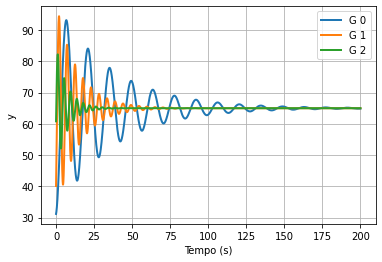

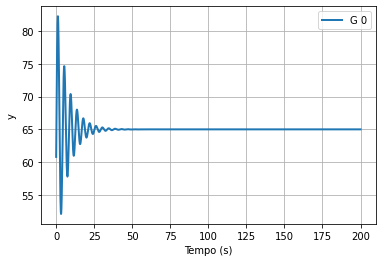

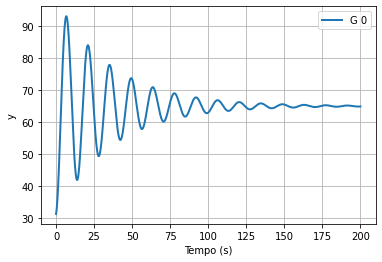

[[3.00000000e+00 1.07100000e-01 2.10000000e+01 2.50313996e-07]
 [5.02880568e+00 1.22613953e-02 2.10000000e+01 5.91298138e-07]
 [5.02880568e+00 1.22613953e-02 2.10000000e+01 5.91298138e-07]
 [8.78173785e+00 1.44723224e-02 7.56639462e+00 6.81515349e-07]
 [8.78173785e+00 1.44723224e-02 7.56639462e+00 6.81515349e-07]
 [6.75088993e+00 1.47575670e-02 8.89966600e+00 7.59204283e-07]
 [7.43076836e+00 1.86675582e-02 1.73074089e+01 7.90505783e-07]
 [8.78173785e+00 6.35274523e-02 1.90611227e+00 1.18507471e-06]
 [8.78173785e+00 6.35274523e-02 1.90611227e+00 1.18507471e-06]
 [8.78173785e+00 6.35274523e-02 1.90611227e+00 1.18507471e-06]
 [8.78173785e+00 6.35274523e-02 1.90611227e+00 1.18507471e-06]
 [8.78173785e+00 6.35274523e-02 1.90611227e+00 1.18507471e-06]
 [1.52891666e+01 1.35761673e-01 2.42809981e-02 2.14044627e-06]
 [1.52891666e+01 1.35761673e-01 2.42809981e-02 2.14044627e-06]
 [1.52891666e+01 1.35761673e-01 2.42809981e-02 2.14044627e-06]
 [1.52891666e+01 1.35761673e-01 2.42809981e-02 2.140446

In [79]:
planta.plot([betters[0],betters[10],betters[len(betters)-1]])
planta.plot([betters[len(betters)-1]])
planta.plot([betters[0]])
print(betters)

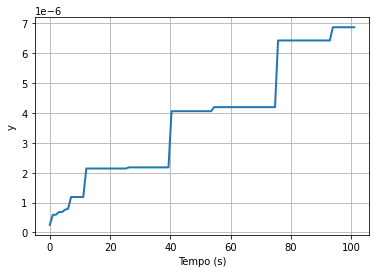

In [80]:
plt.figure()
plt.plot(np.linspace(0,len(betters),len(betters)), betters.T[3], lw=2)
plt.xlabel('Tempo (s)')
plt.ylabel('y')
plt.grid()
plt.show()